# 一维晶格振动模拟（N个粒子）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
def F(x):
    return -(x-a)-(x-a)*abs(x-a)-abs(x-a)*(x-a)**2-abs(x-a)*(x-a)**3


n = 20
a = 1  # 弹簧原长设置为1


def H(w, t):

    return_array = []
    for i in range(n):
        return_array.append(w[n+i])
    return_array.append(F(w[0])-F(w[1]-w[0]))
    for i in range(1, n-1):
        return_array.append(F(w[i]-w[i-1])-F(w[i+1]-w[i]))
    return_array.append(F(w[n-1]-w[n-2])-F((n+1)*a-w[n-1]))

    return return_array  # 返回值矩阵:x0,p0,x1,p1...


def T(w):  # 定义动能
    ek = 0
    for i in range(n):
        ek += np.power(w[n+i], 2)/2
    return ek


def V(w):  # 定义势能
    ep = 0
    ep += np.power(w[0]-a, 2)/2+np.power(abs(w[0]-a), 3)/3 + \
        np.power(w[0]-a, 4)/4+np.power(abs(w[0]-a), 5)/5
    for i in range(1, n-1):
        ep += np.power(w[i]-w[i-1]-a, 2)/2+np.power(abs(w[i]-w[i-1]-a), 3) / \
            3+np.power(w[i]-w[i-1]-a, 4)/4+np.power(abs(w[i]-w[i-1]-a), 5)/5
    ep += np.power(n*a+a-w[n-1], 2)/2+np.power(abs(n*a+a-w[n-1]), 3) / \
        3+np.power(n*a+a-w[n-1], 4)/4+np.power(abs(n*a+a-w[n-1]), 5)/5
    return ep

In [223]:
X0 = np.zeros(n)
P0 = np.zeros(n)
for i in range(n):  # 位置赋值为平衡点#动量设置为0
    X0[i] = i+1
    P0[i] = 0


t = np.arange(0, 100, 0.01)

track = odeint(H, np.append(X0, P0), t)

2个3个的时间演化图，相图   
10个原子的情况,看系统的能量和温度的图，能量加一个变化看T的变化、能量和cv的图

两个粒子3个弹簧下解析求解哈密顿方程

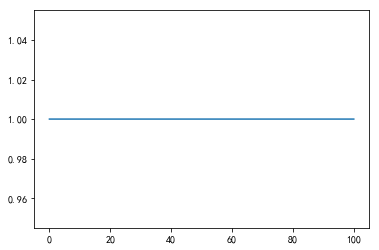

In [59]:
x1 = track[:, 0]
plt.plot(t, x1)

可见以上模拟方法正确 

## 1个粒子（2个弹簧）的情况

In [100]:
def H0(w, t):
    x1, p1 = w
    return np.array([p1, F(x1)-F(2*a-x1)])


t = np.arange(0, 100, 0.01)

track1 = odeint(H0, (1.2, 0), t)

In [101]:
x1 = track1[:, 0]
p1 = track1[:, 1]

Text(0.5,1,'p1-x1(x10=1.2)')

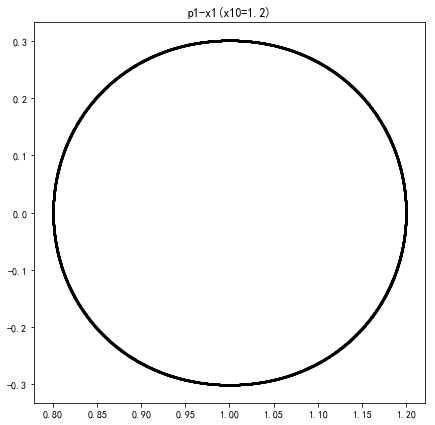

In [106]:
plt.figure(figsize=(7, 7))
plt.scatter(x1, p1, s=1, c='k')
plt.title('p1-x1(x10=1.2)')

Text(0.5,1,'p1-t(x10=1.2)')

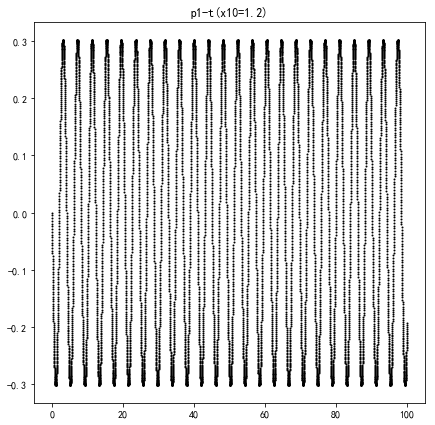

In [105]:
plt.figure(figsize=(7, 7))
plt.scatter(t, p1, s=1, c='k')
plt.title('p1-t(x10=1.2)')

## 2个粒子（3弹簧）的情况

In [324]:
n = 2
X0 = np.zeros(n)  # 位置赋值为平衡点
P0 = np.zeros(n)  # 动量设置为0
for i in range(n):
    X0[i] = i+1
    P0[i] = 0


t = np.arange(0, 100, 0.01)

track2 = odeint(H, np.append(X0, P0), t)

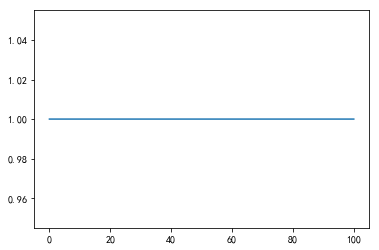

In [325]:
x1 = track2[:, 0]
plt.plot(t, x1)

In [326]:
n = 2
X0 = np.zeros(n)  # 位置赋值为平衡点

P0 = np.zeros(n)  # 动量设置为0

for i in range(n):
    X0[i] = i+1
    P0[i] = 0

X0[0] = 1.2

t = np.arange(0, 100, 0.01)

track2 = odeint(H, np.append(X0, P0), t)

Text(0.5,1,'x1-x2(x10=1.2)')

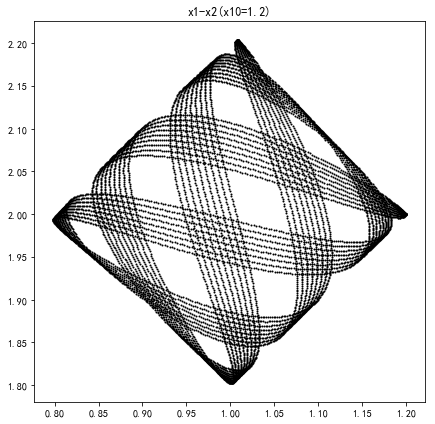

In [327]:
x1 = track2[:, 0]
x2 = track2[:, 1]
p1 = track2[:, 2]
p2 = track2[:, 3]
plt.figure(figsize=(7, 7))
plt.scatter(x1, x2, s=1, c='k')
plt.title('x1-x2(x10=1.2)')

Text(0.5,1,'x1-p1(x10=1.2)')

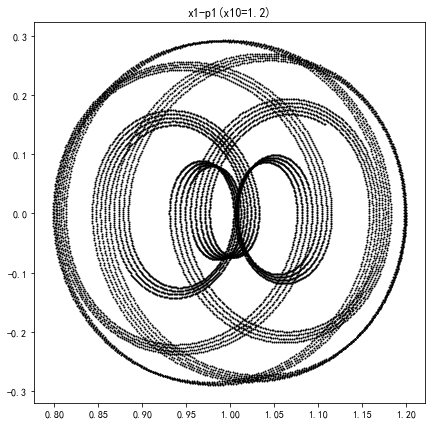

In [328]:
plt.figure(figsize=(7, 7))
plt.scatter(x1, p1, s=1, c='k')
plt.title('x1-p1(x10=1.2)')

Text(0.5,1,'x1-t(x10=1.2)')

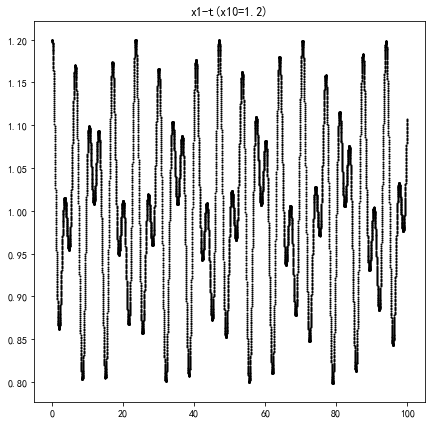

In [329]:
plt.figure(figsize=(7, 7))
plt.scatter(t, x1, s=1, c='k')
plt.title('x1-t(x10=1.2)')

Text(0.5,1,'p1-t(x10=1.2)')

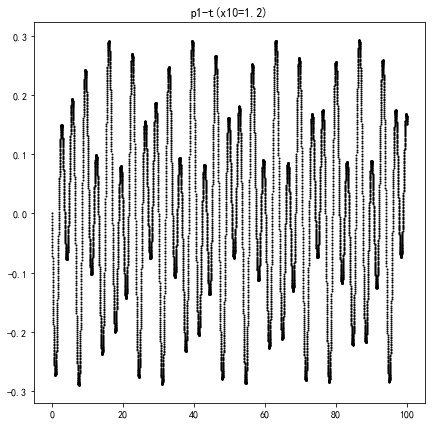

In [330]:
plt.figure(figsize=(7, 7))
plt.scatter(t, p1, s=1, c='k')
plt.title('p1-t(x10=1.2)')

### T=0时的庞加莱截面

In [331]:
x1_ = []
x2_ = []
p1_ = []
p2_ = []
for i in range(len(x1)):
    if (np.abs(T(track2[i])) < 0.001):
        x1_.append(x1[i])
        x2_.append(x2[i])
        p1_.append(p1[i])
        p2_.append(p2[i])

Text(0.5,1,'x1-x2(T=0)')

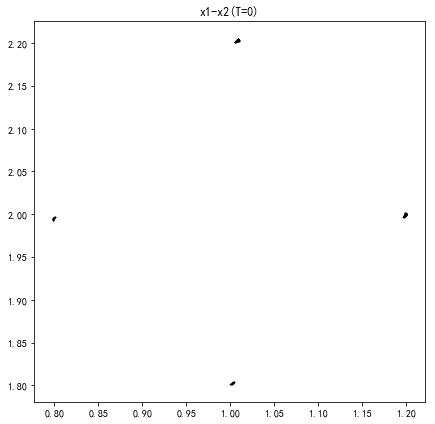

In [332]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, x2_, s=0.5, c='k')
plt.title('x1-x2(T=0)')

Text(0.5,1,'x1-p1(T=0)')

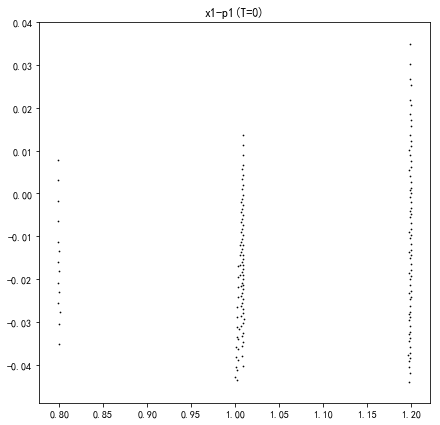

In [333]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, p1_, s=0.5, c='k')
plt.title('x1-p1(T=0)')

In [334]:
k = []
p = []
for i in range(len(x1)):
    k.append(T(track2[i]))
    p.append(V(track2[i]))

Text(0.5,1,'T-t')

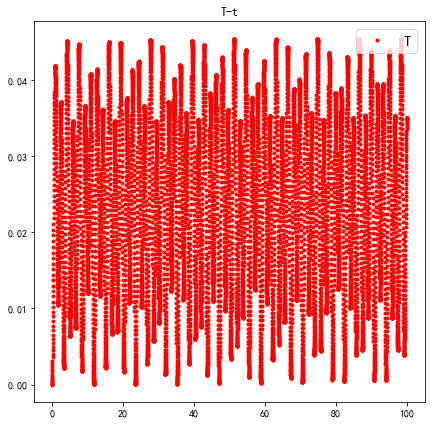

In [335]:
plt.figure(figsize=(7, 7))
plt.plot(t, k, 'r.', label="T")
# plt.plot(t,p,'g.',label="P")
plt.legend(loc='upper right', fontsize=15)
plt.title('T-t')

Text(0.5,1,'V-t')

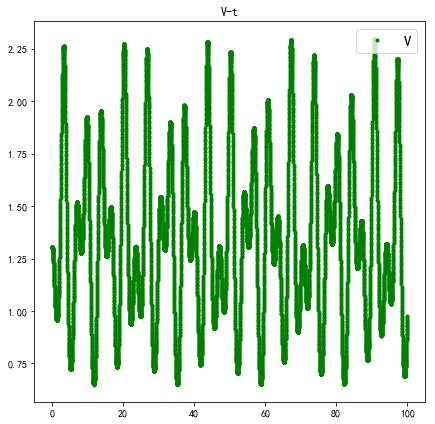

In [336]:
plt.figure(figsize=(7, 7))
# plt.plot(t,k,'r.',label="T")
plt.plot(t, p, 'g.', label="V")
plt.legend(loc='upper right', fontsize=15)
plt.title('V-t')

## 3个粒子（4弹簧情况）

In [309]:
n = 3
X0 = np.zeros(n)  # 位置赋值为平衡点
P0 = np.zeros(n)  # 动量设置为0
for i in range(n):
    X0[i] = i+1
    P0[i] = 0
X0[0] = 1.2


t = np.arange(0, 100, 0.01)

track3 = odeint(H, np.append(X0, P0), t)

Text(0.5,1,'x1-x2(x10=1.2)')

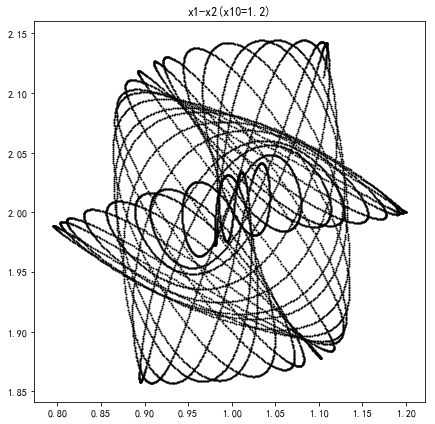

In [310]:
x1 = track3[:, 0]
x2 = track3[:, 1]
p1 = track3[:, 2]
p2 = track3[:, 3]
plt.figure(figsize=(7, 7))
plt.scatter(x1, x2, s=1, c='k')
plt.title('x1-x2(x10=1.2)')

Text(0.5,1,'x1-p1(x10=1.2)')

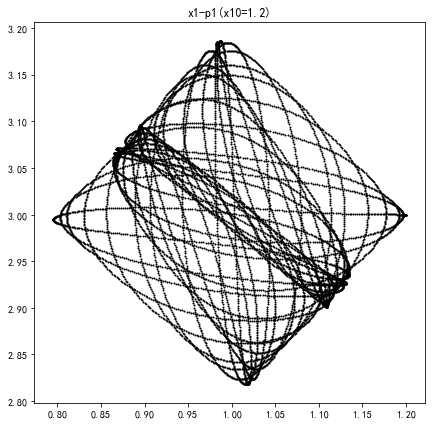

In [259]:
plt.figure(figsize=(7, 7))
plt.scatter(x1, p1, s=1, c='k')
plt.title('x1-p1(x10=1.2)')

Text(0.5,1,'x1-t(x10=1.2)')

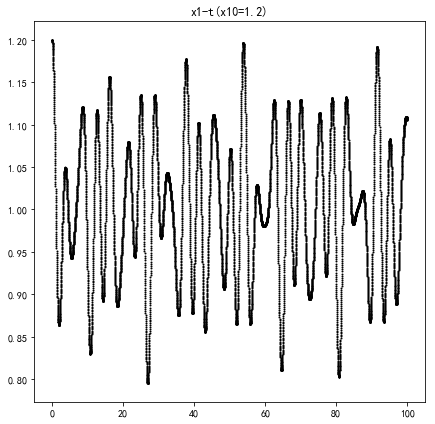

In [260]:
plt.figure(figsize=(7, 7))
plt.scatter(t, x1, s=1, c='k')
plt.title('x1-t(x10=1.2)')

Text(0.5,1,'p1-t(x10=1.2)')

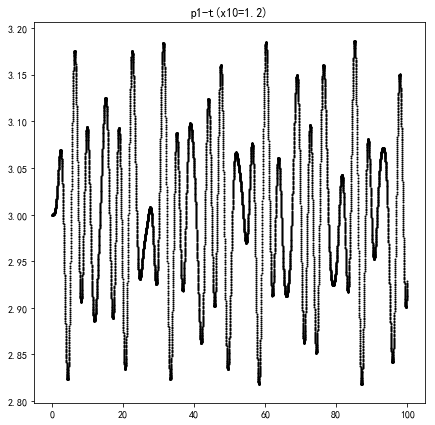

In [261]:
plt.figure(figsize=(7, 7))
plt.scatter(t, p1, s=1, c='k')
plt.title('p1-t(x10=1.2)')

### T=0时的庞加莱截面

In [249]:
x1_ = []
x2_ = []
p1_ = []
p2_ = []
for i in range(len(x1)):
    if (np.abs(T(track3[i])) < 0.001):
        x1_.append(x1[i])
        x2_.append(x2[i])
        p1_.append(p1[i])
        p2_.append(p2[i])

Text(0.5,1,'x1-x2(T=0)')

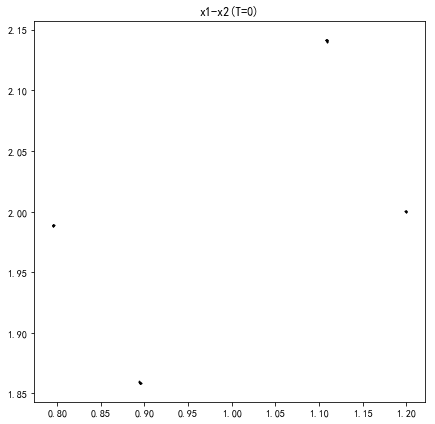

In [250]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, x2_, s=0.5, c='k')
plt.title('x1-x2(T=0)')

Text(0.5,1,'x1-p1(T=0)')

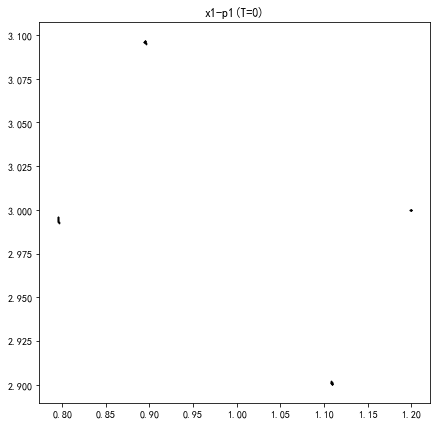

In [251]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, p1_, s=0.5, c='k')
plt.title('x1-p1(T=0)')

In [311]:
k = []
p = []
for i in range(len(x1)):
    k.append(T(track3[i]))
    p.append(V(track3[i]))

Text(0.5,1,'T,V-t')

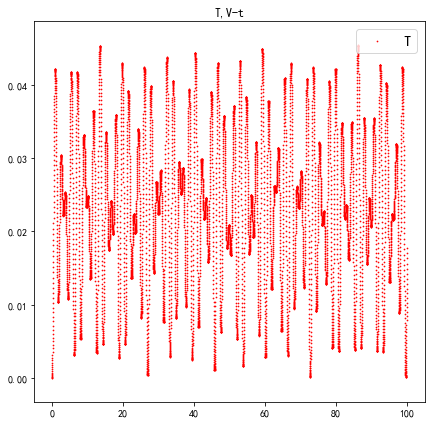

In [320]:
plt.figure(figsize=(7, 7))
plt.scatter(t, k, s=0.5, c='r', label='T')
# plt.scatter(t,p,s=0.5,c='g',label='V')
plt.legend(loc='upper right', fontsize=15)
plt.title('T-t')

Text(0.5,1,'V-t')

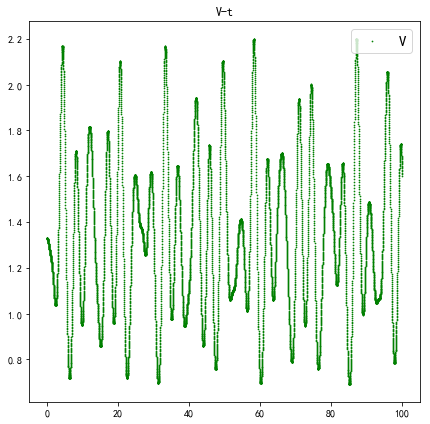

In [321]:
plt.figure(figsize=(7, 7))
# plt.scatter(t,k,s=0.5,c='r',label='T')
plt.scatter(t, p, s=0.5, c='g', label='V')
plt.legend(loc='upper right', fontsize=15)
plt.title('V-t')

### x1=1时的庞加莱截面

In [271]:
x1_ = []
x2_ = []
p1_ = []
p2_ = []
for i in range(len(x1)):
    if (np.abs(1-x1[i])) < 0.01:
        x2_.append(x2[i])
        p1_.append(p1[i])
        p2_.append(p2[i])

Text(0.5,1,'p2-x2(T=0)')

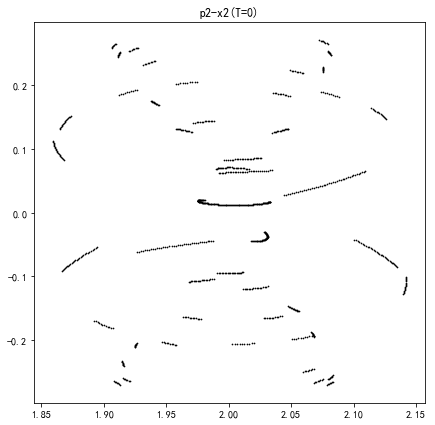

In [272]:
plt.figure(figsize=(7, 7))
plt.scatter(x2_, p2_, s=0.5, c='k')
plt.title('p2-x2(T=0)')

## 4个粒子（5个弹簧）的情况

In [337]:
n = 4
X0 = np.zeros(n)  # 位置赋值为平衡点
P0 = np.zeros(n)  # 动量设置为0
for i in range(n):
    X0[i] = i+1
    P0[i] = 0
X0[0] = 1.2


t = np.arange(0, 300, 0.01)

track4 = odeint(H, np.append(X0, P0), t)

Text(0.5,1,'x2-x1(x10=1.2)')

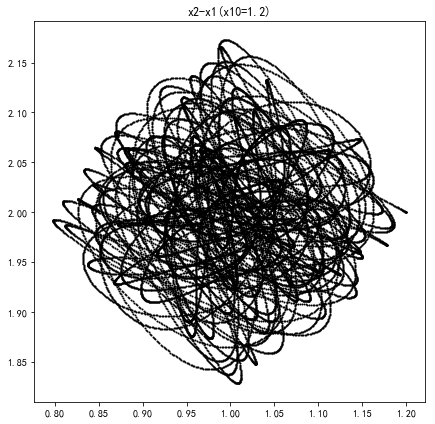

In [338]:
x1 = track4[:, 0]
x2 = track4[:, 1]
p1 = track4[:, 2]
p2 = track4[:, 3]
plt.figure(figsize=(7, 7))
plt.scatter(x1, x2, s=1, c='k')
plt.title('x2-x1(x10=1.2)')

Text(0.5,1,'p1-x1(x10=1.2)')

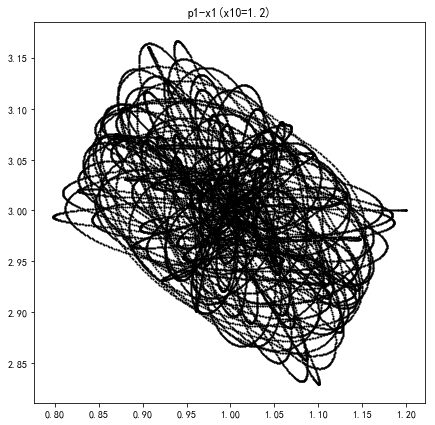

In [339]:
plt.figure(figsize=(7, 7))
plt.scatter(x1, p1, s=1, c='k')
plt.title('p1-x1(x10=1.2)')

Text(0.5,1,'x1-t(x10=1.2)')

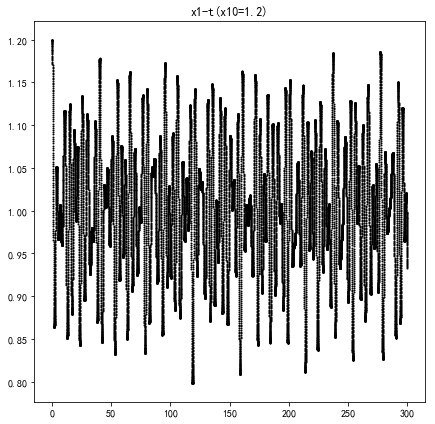

In [340]:
plt.figure(figsize=(7, 7))
plt.scatter(t, x1, s=1, c='k')
plt.title('x1-t(x10=1.2)')

Text(0.5,1,'p1-t(x10=1.2)')

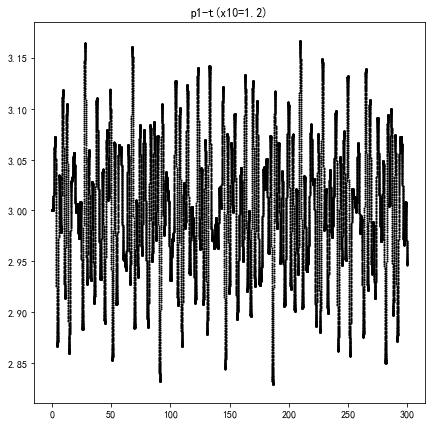

In [341]:
plt.figure(figsize=(7, 7))
plt.scatter(t, p1, s=1, c='k')
plt.title('p1-t(x10=1.2)')

### T=0时的庞加莱截面

In [342]:
x1_ = []
x2_ = []
p1_ = []
p2_ = []
for i in range(len(x1)):
    if (np.abs(T(track4[i])) < 0.0015):
        x1_.append(x1[i])
        x2_.append(x2[i])
        p1_.append(p1[i])
        p2_.append(p2[i])

Text(0.5,1,'x1-x2(T=0)')

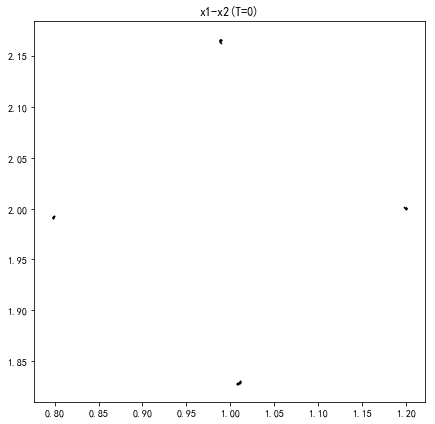

In [343]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, x2_, s=0.5, c='k')
plt.title('x1-x2(T=0)')

Text(0.5,1,'x1-p1(T=0)')

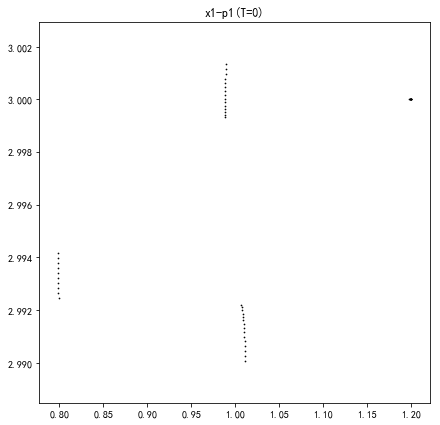

In [344]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, p1_, s=0.5, c='k')
plt.title('x1-p1(T=0)')

In [345]:
k = []
p = []
for i in range(len(x1)):
    k.append(T(track4[i]))
    p.append(V(track4[i]))

Text(0.5,1,'T-t')

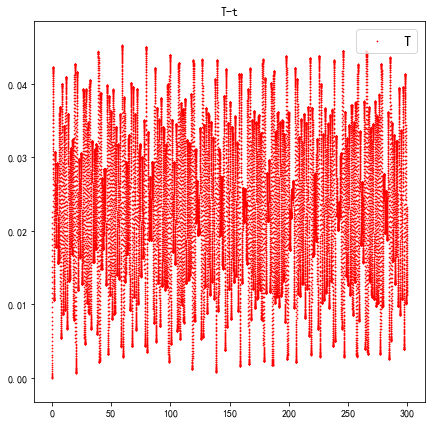

In [346]:
plt.figure(figsize=(7, 7))
plt.scatter(t, k, s=0.5, c='r', label='T')
# plt.scatter(t,p,s=0.5,c='g',label='V')
plt.legend(loc='upper right', fontsize=15)
plt.title('T-t')

Text(0.5,1,'V-t')

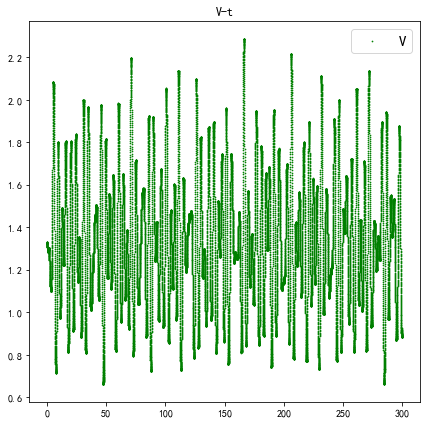

In [347]:
plt.figure(figsize=(7, 7))
# plt.scatter(t,k,s=0.5,c='r',label='T')
plt.scatter(t, p, s=0.5, c='g', label='V')
plt.legend(loc='upper right', fontsize=15)
plt.title('V-t')

### x1=1时的庞加莱截面

In [348]:
x1_ = []
x2_ = []
p1_ = []
p2_ = []
for i in range(len(x1)):
    if (np.abs(1-x1[i])) < 0.001:
        x2_.append(x2[i])
        p1_.append(p1[i])
        p2_.append(p2[i])

Text(0.5,1,'p2-x2(T=0)')

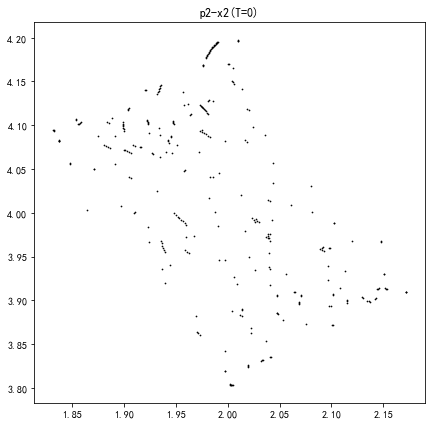

In [349]:
plt.figure(figsize=(7, 7))
plt.scatter(x2_, p2_, s=0.5, c='k')
plt.title('p2-x2(T=0)')

### 若更改初始条件，不施加认为扰动而生成满足高斯分布的初值

In [412]:
n = 4
X0 = np.zeros(n)  # 位置赋值为平衡点
P0 = np.zeros(n)  # 动量设置为0
for i in range(n):
    X0[i] = i+1+0.1*np.random.normal(loc=0.0, scale=1)
    P0[i] = 0.1*np.random.normal(loc=0.0, scale=1)
# X0[0]=1.2


t = np.arange(0, 300, 0.01)

track4 = odeint(H, np.append(X0, P0), t)

Text(0.5,1,'x2-x1(x10=1.2)')

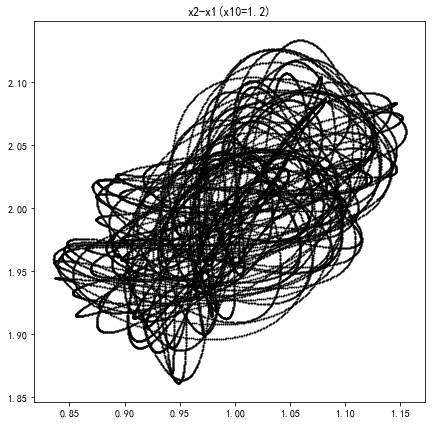

In [413]:
x1 = track4[:, 0]
x2 = track4[:, 1]
p1 = track4[:, 2]
p2 = track4[:, 3]
plt.figure(figsize=(7, 7))
plt.scatter(x1, x2, s=1, c='k')
plt.title('x2-x1(x10=1.2)')

Text(0.5,1,'p1-x1(x10=1.2)')

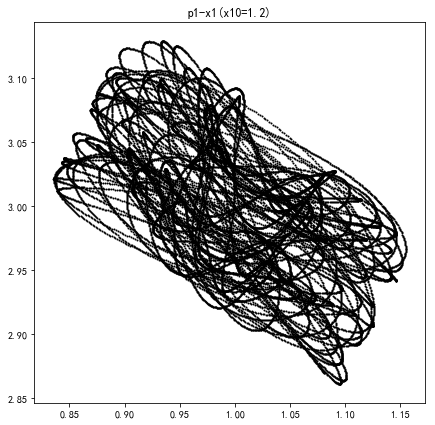

In [414]:
plt.figure(figsize=(7, 7))
plt.scatter(x1, p1, s=1, c='k')
plt.title('p1-x1(x10=1.2)')

Text(0.5,1,'x1-t(x10=1.2)')

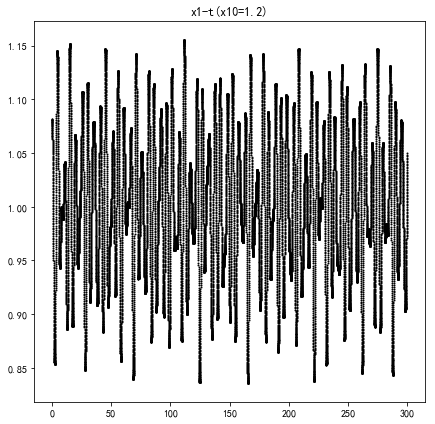

In [415]:
plt.figure(figsize=(7, 7))
plt.scatter(t, x1, s=1, c='k')
plt.title('x1-t(x10=1.2)')

Text(0.5,1,'p1-t(x10=1.2)')

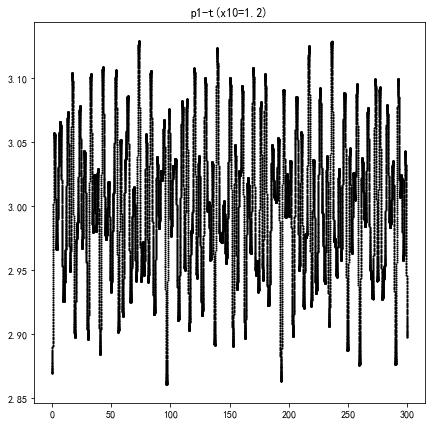

In [416]:
plt.figure(figsize=(7, 7))
plt.scatter(t, p1, s=1, c='k')
plt.title('p1-t(x10=1.2)')

### T=0时的庞加莱截面

In [422]:
x1_ = []
x2_ = []
p1_ = []
p2_ = []
for i in range(len(x1)):
    if (np.abs(T(track4[i])) < 0.00015):
        x1_.append(x1[i])
        x2_.append(x2[i])
        p1_.append(p1[i])
        p2_.append(p2[i])

Text(0.5,1,'x1-x2(T=0)')

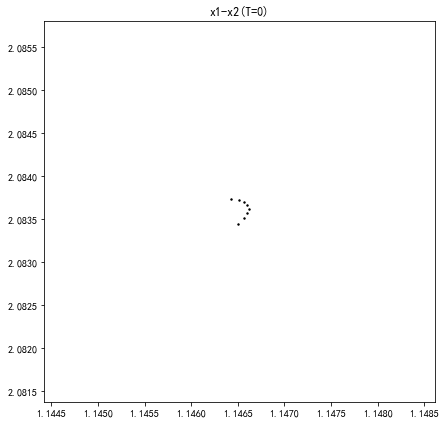

In [425]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, x2_, s=2, c='k')
plt.title('x1-x2(T=0)')

Text(0.5,1,'x1-p1(T=0)')

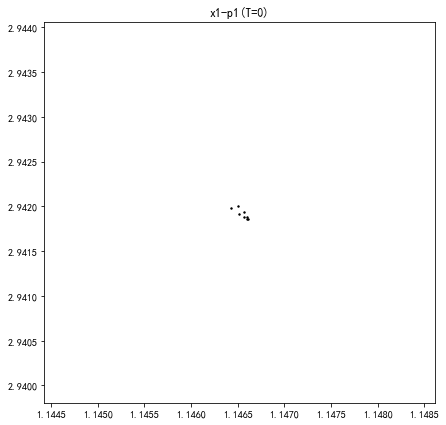

In [426]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, p1_, s=2, c='k')
plt.title('x1-p1(T=0)')

In [427]:
k = []
p = []
for i in range(len(x1)):
    k.append(T(track4[i]))
    p.append(V(track4[i]))

Text(0.5,1,'T-t')

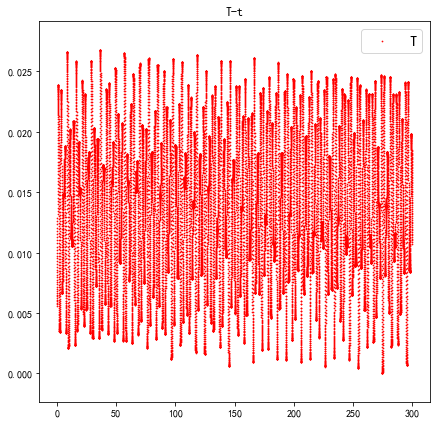

In [428]:
plt.figure(figsize=(7, 7))
plt.scatter(t, k, s=0.5, c='r', label='T')
# plt.scatter(t,p,s=0.5,c='g',label='V')
plt.legend(loc='upper right', fontsize=15)
plt.title('T-t')

Text(0.5,1,'V-t')

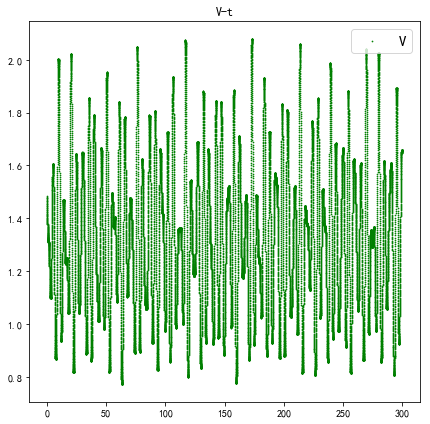

In [429]:
plt.figure(figsize=(7, 7))
# plt.scatter(t,k,s=0.5,c='r',label='T')
plt.scatter(t, p, s=0.5, c='g', label='V')
plt.legend(loc='upper right', fontsize=15)
plt.title('V-t')

## 100个粒子的情形

In [430]:
n = 100
X0 = np.zeros(n)  # 位置赋值为0
P0 = np.zeros(n)  # 动量设置为0
for i in range(n):
    X0[i] = i+1+0.1*np.random.normal(loc=0.0, scale=1)
    P0[i] = 0.1*np.random.normal(loc=0.0, scale=1)
# X0[0]=1.2


t = np.arange(0, 100, 0.01)

track100 = odeint(H, np.append(X0, P0), t)

Text(0.5,1,'p1-x1(x10=1.2)')

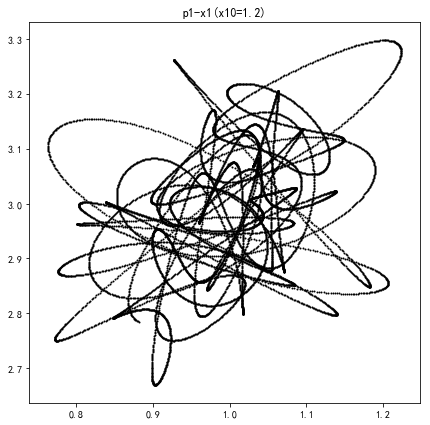

In [431]:
x1 = track100[:, 0]
x2 = track100[:, 1]
p1 = track100[:, 2]
p2 = track100[:, 3]
plt.figure(figsize=(7, 7))
plt.scatter(x1, p1, s=1, c='k')
plt.title('p1-x1(x10=1.2)')

Text(0.5,1,'x1-t(x10=1.2)')

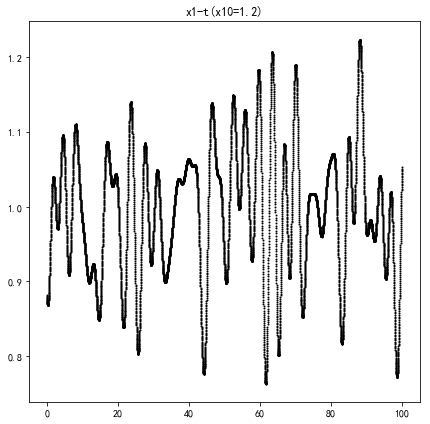

In [432]:
plt.figure(figsize=(7, 7))
plt.scatter(t, x1, s=1, c='k')
plt.title('x1-t(x10=1.2)')

Text(0.5,1,'p1-t(x10=1.2)')

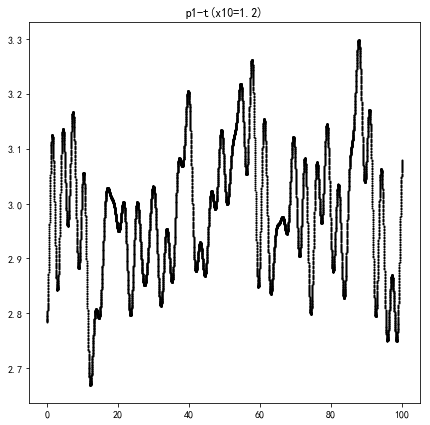

In [433]:
plt.figure(figsize=(7, 7))
plt.scatter(t, p1, s=1, c='k')
plt.title('p1-t(x10=1.2)')

In [442]:
x1_ = []
x2_ = []
p1_ = []
p2_ = []
for i in range(len(x1)):
    if (np.abs(T(track100[i])) < 0.5):
        x1_.append(x1[i])
        x2_.append(x2[i])
        p1_.append(p1[i])
        p2_.append(p2[i])

Text(0.5,1,'x1-p1(T=0)')

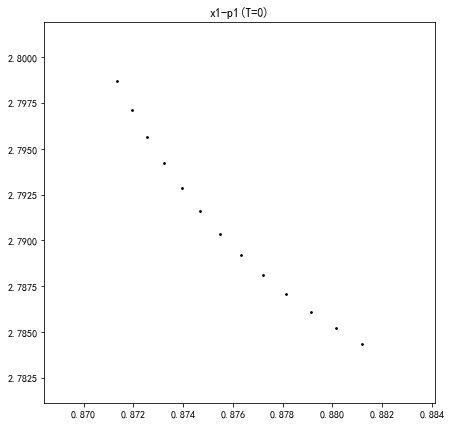

In [446]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, p1_, s=3, c='k')
plt.title('x1-p1(T=0)')

Text(0.5,1,'x1-x2(T=0)')

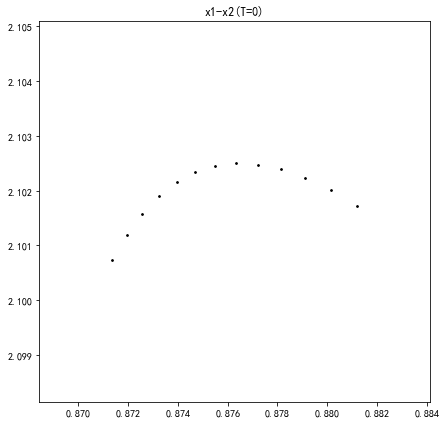

In [445]:
plt.figure(figsize=(7, 7))
plt.scatter(x1_, x2_, s=3, c='k')
plt.title('x1-x2(T=0)')

# 探究100个粒子系统温度和热容随总能量的关系

In [3]:
n = 100
temperature = []

for i in np.arange(0, 100, 5):  # 总能量的变化范围
    X0 = np.zeros(n)  # 位置赋值为0
    P0 = np.zeros(n)  # 动量设置为0
    t = np.arange(0, 50, 0.5)
    for m in range(n):
        X0[m] = m+1  # 位置在平衡位置
        P0[m] = np.sqrt(i/50)*np.random.normal(loc=0.0, scale=1)
    temperature.append(T(odeint(H, np.append(X0, P0), t)[-1]))

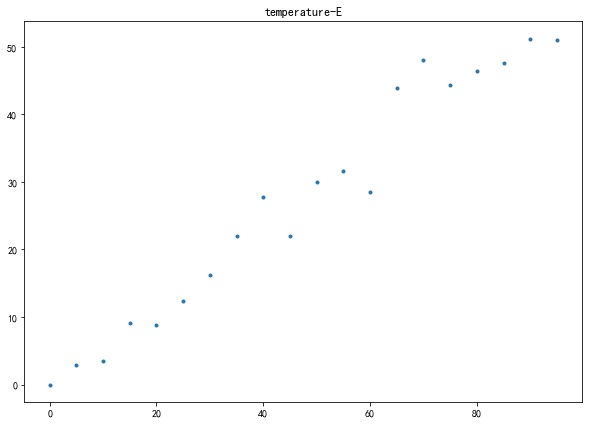

In [4]:
plt.figure(figsize=(10, 7))
plt.title('temperature-E')
plt.plot(np.arange(0, 100, 5), temperature, ".")

In [5]:
# 进行线性拟合
from scipy import optimize


def f(x, A, B):
    return A*x + B


A1, B1 = optimize.curve_fit(f, np.arange(0, 100, 5), temperature)[0]

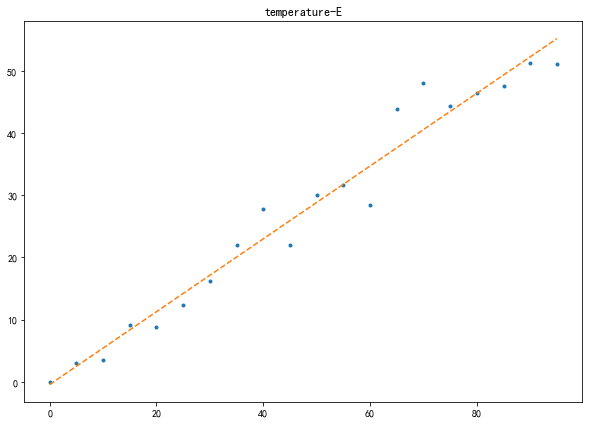

In [6]:
plt.figure(figsize=(10, 7))
plt.title('temperature-E')
plt.plot(np.arange(0, 100, 5), temperature, ".")
plt.plot(np.arange(0, 100, 5), f(np.arange(0, 100, 5), A1, B1), "--")

In [7]:
print(A1)
print(1/A1)

0.5851607063543367
1.7089322456905753


等容热容为$\frac{dE}{dT}$,即直线斜率的倒数=1.7（接近1.8）